In [1]:
import geopandas as gpd
import pandas as pd
import sqlite3
import os

# Importando os bancos de dados

In [2]:
conn = sqlite3.connect(os.path.join('brasil.db'))
br = pd.read_sql('SELECT id, name, geometry FROM brasil', conn)
type(br)

pandas.core.frame.DataFrame

In [3]:
conn1 = sqlite3.connect(os.path.join('pib.db'))
pib = pd.read_sql('SELECT gid, UF, nome, Censo, PIB, Pop_est_2009, PIB_percapita, classe, geometry FROM pib', conn1)
type(pib)

pandas.core.frame.DataFrame

In [4]:
conn2 = sqlite3.connect(os.path.join('racial.db'))
racial = pd.read_sql('SELECT gid, UF, nome, Censo, POP_TOT, Pessoas_Pretas, PER_Pessoas_Pretas, classe, geometry FROM racial', conn2)
type(racial)

pandas.core.frame.DataFrame

### Transformando os DataFrames para o tipo GeoDataFrame

In [5]:
br = gpd.GeoDataFrame(br)

In [6]:
pib = gpd.GeoDataFrame(pib)

In [7]:
racial = gpd.GeoDataFrame(racial)

## Tratando os dados

In [8]:
br = br.sort_values('name')
br['name'] = br['name'].str.title()
br.head()

,id,name,geometry
5317,5200050,Abadia De Goiás,"POLYGON ((-49.4116188754 -16.7404731638, -49.4..."
2242,3100104,Abadia Dos Dourados,"POLYGON ((-47.4440984617 -18.1584651772, -47.4..."
5318,5200100,Abadiânia,"POLYGON ((-48.8413680012 -16.0044227658, -48.7..."
151,1500107,Abaetetuba,"POLYGON ((-48.8124539972 -1.6016538932, -48.80..."
2243,3100203,Abaeté,"POLYGON ((-45.1820043274 -18.8875672971, -45.1..."


In [9]:
pib = pib.sort_values('nome')
pib['nome'] = pib['nome'].str.title()
pib = pib.drop('classe', 1)
pib.head()

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,geometry
4229,254,SERGIPE,Arauá,2010,63633.420,12042.0,5284.29,"MULTIPOLYGON (((-37.50771009 -11.27150952, -37..."
3330,1076,GOIÁS,Abadia De Goiás,2010,38975.133,6301.0,6185.55,"MULTIPOLYGON (((-49.4433195 -16.72349495, -49...."
3492,2687,MINAS GERAIS,Abadia Dos Dourados,2010,71222.170,6805.0,10466.15,"MULTIPOLYGON (((-47.42610987 -18.16379816, -47..."
3976,1077,GOIÁS,Abadiânia,2010,82400.490,13378.0,6159.40,"MULTIPOLYGON (((-48.79593567 -16.01553113, -48..."
2115,2138,PARÁ,Abaetetuba,2010,456256.940,139819.0,3263.20,"MULTIPOLYGON (((-48.80042608 -1.60628755, -48...."


In [10]:
racial = racial.sort_values('nome')
racial['nome'] = racial['nome'].str.title()
racial = racial.drop('classe', 1)
racial.head()

,gid,UF,nome,Censo,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas,geometry
4229,254,SERGIPE,Arauá,2010,10878.0,1525,14.019121,"MULTIPOLYGON (((-37.50771009 -11.27150952, -37..."
3330,1076,GOIÁS,Abadia De Goiás,2010,6876.0,405,5.890052,"MULTIPOLYGON (((-49.4433195 -16.72349495, -49...."
3492,2687,MINAS GERAIS,Abadia Dos Dourados,2010,6704.0,292,4.355608,"MULTIPOLYGON (((-47.42610987 -18.16379816, -47..."
3976,1077,GOIÁS,Abadiânia,2010,15757.0,664,4.214000,"MULTIPOLYGON (((-48.79593567 -16.01553113, -48..."
2115,2138,PARÁ,Abaetetuba,2010,141100.0,9038,6.405386,"MULTIPOLYGON (((-48.80042608 -1.60628755, -48...."


### Unindo os Dataframes sobre o PIB e a população negra

In [11]:
racial = racial.drop(racial.columns[[1,2,3,7]], axis=1) #retirando colunas iguais
merge = pd.merge(pib, racial, how='outer', on='gid')
merge.head()

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,geometry,POP_TOT,Pessoas_Pretas,PER_Pessoas_Pretas
0,254,SERGIPE,Arauá,2010,63633.420,12042.0,5284.29,"MULTIPOLYGON (((-37.50771009 -11.27150952, -37...",10878.0,1525,14.019121
1,1076,GOIÁS,Abadia De Goiás,2010,38975.133,6301.0,6185.55,"MULTIPOLYGON (((-49.4433195 -16.72349495, -49....",6876.0,405,5.890052
2,2687,MINAS GERAIS,Abadia Dos Dourados,2010,71222.170,6805.0,10466.15,"MULTIPOLYGON (((-47.42610987 -18.16379816, -47...",6704.0,292,4.355608
3,1077,GOIÁS,Abadiânia,2010,82400.490,13378.0,6159.40,"MULTIPOLYGON (((-48.79593567 -16.01553113, -48...",15757.0,664,4.214000
4,2138,PARÁ,Abaetetuba,2010,456256.940,139819.0,3263.20,"MULTIPOLYGON (((-48.80042608 -1.60628755, -48....",141100.0,9038,6.405386


## Analisando os dados

In [13]:
merge['PIB_percapita'] = merge['PIB_percapita'].astype(float)
merge['Pop_est_2009'] = merge['Pop_est_2009'].astype(float)
merge['PER_Pessoas_Pretas'] = merge['PER_Pessoas_Pretas'].astype(float)

In [14]:
merge[['PIB', 'Pop_est_2009', 'PIB_percapita', 'PER_Pessoas_Pretas']].agg(['mean', 'median'])

,PIB,Pop_est_2009,PIB_percapita,PER_Pessoas_Pretas
mean,582020.311889,34405.572763,10977.027145,6.410117
median,80591.720000,11203.000000,8393.170000,5.175179


## Plotando os dados

<AxesSubplot:>

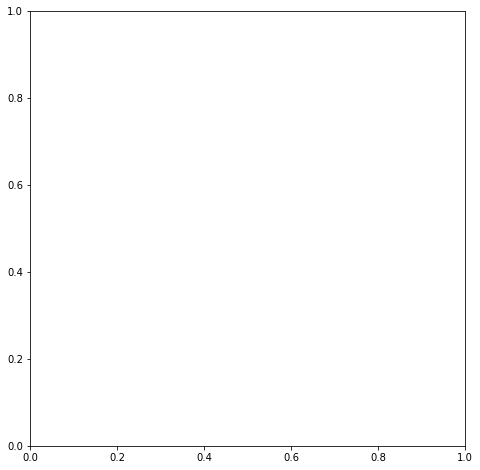

In [15]:
merge.plot(color='green', edgecolor='None', figsize=(15,8))